# [RBAC 2024] ROUND 2: CASE STUDY 
Our task involves conducting a thorough analysis of the relationships between different customer segments 
and the loan products they utilize, as well as identifying the key differences and trends that emerged in 
the years 2022 and 2023. These insights will be essential for understanding customer behavior, market 
conditions, and their impact on the business during this period.

**As a Business Analyst at SHBFinance, you are required to achieve 5 objectives:**
1. Define customers profile of SHBFinance
2. Define the characteristics of loans borrowed
3. Explore the correlation between customer profile and loans borrowed
4. Compare the year-over-year performance of lending activities
5. Give strategic recommendations to improve loan origination and sales

In [430]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [431]:
loan_origin = pd.read_csv('dataset/loan_origin.csv')
demographic = pd.read_csv('dataset/demographic.csv')
print(demographic.columns)
print(loan_origin.columns)

Index(['LABOUR_CONTRACT_TYPE', 'NUMBER_OF_DEPENDANTS',
       'PERMANENT_ADDRESS_PROVINCE', 'INDUSTRY', 'JOB',
       'COMPANY_ADDRESS_PROVINCE', 'CONTRACT_NO', 'WEIGHT', 'EDUCATION',
       'CUSTOMER_INCOME', 'CREDITIBILITY', 'ACCOMMODATION_TYPE',
       'DATE_OF_BIRTH', 'HEIGHT', 'WORKING_IN_YEAR', 'MARITAL_STATUS',
       'INCOME_RESOURCE'],
      dtype='object')
Index(['DISBURSEMENT_CHANNEL', 'LIQUIDITY', 'INSURANCE_COMPANY',
       'INSURANCE_RATE', 'DISBURSEMENT_DATE', 'CONTRACT_NO', 'RATE',
       'HAS_INSURANCE', 'PRODUCT_CATEGORY', 'LOAN_TERM', 'MONTH_INTEREST',
       'LOAN_PURPOSE', 'BUSINESS_LINE', 'LOAN_AMOUNT'],
      dtype='object')


In [432]:
print(demographic.shape)
print(loan_origin.shape)

(371200, 17)
(371200, 14)


In [433]:
loan_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371200 entries, 0 to 371199
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   DISBURSEMENT_CHANNEL  315211 non-null  float64
 1   LIQUIDITY             315574 non-null  float64
 2   INSURANCE_COMPANY     315396 non-null  float64
 3   INSURANCE_RATE        315613 non-null  float64
 4   DISBURSEMENT_DATE     315470 non-null  object 
 5   CONTRACT_NO           315643 non-null  float64
 6   RATE                  315635 non-null  float64
 7   HAS_INSURANCE         315334 non-null  object 
 8   PRODUCT_CATEGORY      315447 non-null  float64
 9   LOAN_TERM             315169 non-null  float64
 10  MONTH_INTEREST        315292 non-null  float64
 11  LOAN_PURPOSE          315973 non-null  float64
 12  BUSINESS_LINE         315584 non-null  float64
 13  LOAN_AMOUNT           315681 non-null  float64
dtypes: float64(12), object(2)
memory usage: 39.6+ MB


In [434]:
demographic.isna

<bound method DataFrame.isna of         LABOUR_CONTRACT_TYPE  NUMBER_OF_DEPENDANTS  \
0                        2.0                   2.0   
1                        4.0                   0.0   
2                        4.0                   0.0   
3                        4.0                   1.0   
4                        4.0                   3.0   
...                      ...                   ...   
371195                   4.0                   3.0   
371196                   4.0                   0.0   
371197                   NaN                   NaN   
371198                   4.0                   0.0   
371199                   4.0                   NaN   

        PERMANENT_ADDRESS_PROVINCE  INDUSTRY  JOB  COMPANY_ADDRESS_PROVINCE  \
0                             20.0      18.0  9.0                      74.0   
1                             58.0      18.0  NaN                      58.0   
2                              NaN       2.0  NaN                      74.0   
3  

In [435]:
loan_origin

,DISBURSEMENT_CHANNEL,LIQUIDITY,INSURANCE_COMPANY,INSURANCE_RATE,DISBURSEMENT_DATE,CONTRACT_NO,RATE,HAS_INSURANCE,PRODUCT_CATEGORY,LOAN_TERM,MONTH_INTEREST,LOAN_PURPOSE,BUSINESS_LINE,LOAN_AMOUNT
0,1.0,3.0,0.0,3.75,2023-09,571094.0,3.0,NaN,0.0,36.0,2.0,1.0,NaN,3450000.0
1,2.0,3.0,NaN,3.75,2023-09,569518.0,4.0,YES,1.0,NaN,2.6,3.0,0.0,3060000.0
2,1.0,1.0,0.0,3.75,2023-09,569723.0,NaN,NaN,0.0,NaN,1.7,3.0,0.0,1520000.0
3,1.0,4.0,1.0,3.75,2023-09,569501.0,0.0,YES,1.0,15.0,2.0,3.0,0.0,NaN
4,1.0,4.0,1.0,3.75,2023-09,NaN,2.0,NaN,0.0,NaN,1.7,3.0,0.0,3060000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371195,1.0,1.0,1.0,3.75,2023-12,630947.0,5.0,YES,2.0,36.0,1.7,3.0,2.0,NaN
371196,1.0,4.0,0.0,3.75,2023-12,823371.0,3.0,YES,1.0,36.0,NaN,6.0,0.0,3060000.0
371197,1.0,NaN,0.0,3.75,2023-12,NaN,0.0,NaN,2.0,18.0,2.3,6.0,NaN,1520000.0
371198,1.0,0.0,1.0,NaN,2023-12,630638.0,NaN,YES,1.0,24.0,2.0,3.0,NaN,1520000.0


## DATA PREPARATION

In [436]:
demographic.drop(columns=['PERMANENT_ADDRESS_PROVINCE', 'COMPANY_ADDRESS_PROVINCE', 'WEIGHT', 'HEIGHT'], inplace = True)

primary_key = ['CONTRACT_NO']
numeric_columns_demographic = ['CUSTOMER_INCOME']
category_columns_demographic = demographic.columns.difference(numeric_columns_demographic + primary_key).tolist()

demographic[primary_key + category_columns_demographic] = demographic[primary_key + category_columns_demographic].astype('Int64')

demographic[numeric_columns_demographic] = demographic[numeric_columns_demographic].fillna(
    demographic[numeric_columns_demographic].mean())

for column in category_columns_demographic:
    demographic[column] = demographic[column].fillna(
        demographic[column].median())

demographic.dropna(subset=['CONTRACT_NO'], inplace=True)

demographic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 315507 entries, 1 to 371199
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   LABOUR_CONTRACT_TYPE  315507 non-null  Int64  
 1   NUMBER_OF_DEPENDANTS  315507 non-null  Int64  
 2   INDUSTRY              315507 non-null  Int64  
 3   JOB                   315507 non-null  Int64  
 4   CONTRACT_NO           315507 non-null  Int64  
 5   EDUCATION             315507 non-null  Int64  
 6   CUSTOMER_INCOME       315507 non-null  float64
 7   CREDITIBILITY         315507 non-null  Int64  
 8   ACCOMMODATION_TYPE    315507 non-null  Int64  
 9   DATE_OF_BIRTH         315507 non-null  Int64  
 10  WORKING_IN_YEAR       315507 non-null  Int64  
 11  MARITAL_STATUS        315507 non-null  Int64  
 12  INCOME_RESOURCE       315507 non-null  Int64  
dtypes: Int64(12), float64(1)
memory usage: 37.3 MB


In [437]:
forein_key = ['CONTRACT_NO']
numeric_columns_loan = ['MONTH_INTEREST', 'INSURANCE_RATE', 'LOAN_AMOUNT']
exclude_column = ['DISBURSEMENT_DATE', 'INSURANCE_COMPANY']
category_columns_loan = loan_origin.columns.difference(numeric_columns_loan + forein_key + exclude_column + ['HAS_INSURANCE']).tolist()

for column in numeric_columns_loan:
    loan_origin[column] = loan_origin[column].fillna(
        loan_origin[column].mean())
    
for column in category_columns_loan:
    loan_origin[column] = loan_origin[column].fillna(
        loan_origin[column].median())

loan_origin['HAS_INSURANCE'] = loan_origin['HAS_INSURANCE'].apply(lambda x: 1 if x == 'YES' else 0)
loan_origin['HAS_INSURANCE'] = loan_origin['HAS_INSURANCE'].fillna(
        loan_origin['HAS_INSURANCE'].median())

loan_origin['DISBURSEMENT_YEAR'] = loan_origin['DISBURSEMENT_DATE'].apply(lambda x: str(x).split('-')[0] if '-' in str(x) else x)
loan_origin['DISBURSEMENT_MONTH'] = loan_origin['DISBURSEMENT_DATE'].apply(lambda x: str(x).split('-')[1] if '-' in str(x) else x)

loan_origin.drop(columns=['DISBURSEMENT_DATE', 'INSURANCE_COMPANY'], inplace=True)
loan_origin.dropna(subset=['CONTRACT_NO', 'DISBURSEMENT_YEAR'], inplace=True)

category_columns_loan += ['DISBURSEMENT_YEAR', 'DISBURSEMENT_MONTH', 'HAS_INSURANCE']
loan_origin[forein_key + category_columns_loan] = loan_origin[forein_key + category_columns_loan].astype('Int64')

loan_origin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268129 entries, 0 to 371199
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   DISBURSEMENT_CHANNEL  268129 non-null  Int64  
 1   LIQUIDITY             268129 non-null  Int64  
 2   INSURANCE_RATE        268129 non-null  float64
 3   CONTRACT_NO           268129 non-null  Int64  
 4   RATE                  268129 non-null  Int64  
 5   HAS_INSURANCE         268129 non-null  Int64  
 6   PRODUCT_CATEGORY      268129 non-null  Int64  
 7   LOAN_TERM             268129 non-null  Int64  
 8   MONTH_INTEREST        268129 non-null  float64
 9   LOAN_PURPOSE          268129 non-null  Int64  
 10  BUSINESS_LINE         268129 non-null  Int64  
 11  LOAN_AMOUNT           268129 non-null  float64
 12  DISBURSEMENT_YEAR     268129 non-null  Int64  
 13  DISBURSEMENT_MONTH    268129 non-null  Int64  
dtypes: Int64(11), float64(3)
memory usage: 33.5 MB


In [438]:
merged_df = pd.merge(demographic, loan_origin, on='CONTRACT_NO', how='inner')
# Scale the income and loan amount to millions (unit: 1,000,000 VND)
# merged_df['CUSTOMER_INCOME'] = merged_df['CUSTOMER_INCOME'] / 1e6
# merged_df['LOAN_AMOUNT'] = merged_df['LOAN_AMOUNT'] / 1e6
merged_df['AGE'] = 2024 - merged_df['DATE_OF_BIRTH']
merged_df.shape

(227940, 27)

In [439]:
merged_2022 = merged_df[merged_df['DISBURSEMENT_YEAR'] == 2022]
merged_2022.Name = '2022'
merged_2023 = merged_df[merged_df['DISBURSEMENT_YEAR'] == 2023]
merged_2023.Name = '2023'

# Reset index for both DataFrames
merged_2022.reset_index(drop=True, inplace=True)
merged_2023.reset_index(drop=True, inplace=True)


merged_df.to_csv('merged_df.csv')
merged_2022.to_csv('merged_2022.csv')
merged_2023.to_csv('merged_2023.csv')

In [440]:
merged_df.columns

Index(['LABOUR_CONTRACT_TYPE', 'NUMBER_OF_DEPENDANTS', 'INDUSTRY', 'JOB',
       'CONTRACT_NO', 'EDUCATION', 'CUSTOMER_INCOME', 'CREDITIBILITY',
       'ACCOMMODATION_TYPE', 'DATE_OF_BIRTH', 'WORKING_IN_YEAR',
       'MARITAL_STATUS', 'INCOME_RESOURCE', 'DISBURSEMENT_CHANNEL',
       'LIQUIDITY', 'INSURANCE_RATE', 'RATE', 'HAS_INSURANCE',
       'PRODUCT_CATEGORY', 'LOAN_TERM', 'MONTH_INTEREST', 'LOAN_PURPOSE',
       'BUSINESS_LINE', 'LOAN_AMOUNT', 'DISBURSEMENT_YEAR',
       'DISBURSEMENT_MONTH', 'AGE'],
      dtype='object')

In [441]:
from scipy.stats import chi2_contingency
merged_df.columns
# print(category_columns_demographic)
# category_columns_demographic.remove(['DATE_OF_BIRTH','NUMBER_OF_DEPENDANTS','WORKING_IN_YEAR'])
category_columns_demographic.remove('DATE_OF_BIRTH')
category_columns_demographic.remove('NUMBER_OF_DEPENDANTS')
category_columns_demographic.remove('WORKING_IN_YEAR')
res = {}
for column in category_columns_demographic:
    contingency_table = pd.crosstab(merged_df['PRODUCT_CATEGORY'], merged_df[column])
    print('Hyphothesis testing for', column, 'and PRODUCT_CATEGORY')
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    if p_value < 0.05:
        res[column] = p_value
        print('There is a relationship between', column, 'and PRODUCT_CATEGORY with p_value: ', p_value)
    else:
        print('There is no relationship between', column, 'and PRODUCT_CATEGORY')
print(res)

Hyphothesis testing for ACCOMMODATION_TYPE and PRODUCT_CATEGORY
There is a relationship between ACCOMMODATION_TYPE and PRODUCT_CATEGORY with p_value:  0.0
Hyphothesis testing for CREDITIBILITY and PRODUCT_CATEGORY
There is a relationship between CREDITIBILITY and PRODUCT_CATEGORY with p_value:  0.02908909877912863
Hyphothesis testing for EDUCATION and PRODUCT_CATEGORY
There is a relationship between EDUCATION and PRODUCT_CATEGORY with p_value:  0.0
Hyphothesis testing for INCOME_RESOURCE and PRODUCT_CATEGORY
There is a relationship between INCOME_RESOURCE and PRODUCT_CATEGORY with p_value:  0.0
Hyphothesis testing for INDUSTRY and PRODUCT_CATEGORY
There is a relationship between INDUSTRY and PRODUCT_CATEGORY with p_value:  0.0
Hyphothesis testing for JOB and PRODUCT_CATEGORY
There is a relationship between JOB and PRODUCT_CATEGORY with p_value:  0.0
Hyphothesis testing for LABOUR_CONTRACT_TYPE and PRODUCT_CATEGORY
There is a relationship between LABOUR_CONTRACT_TYPE and PRODUCT_CATEGOR

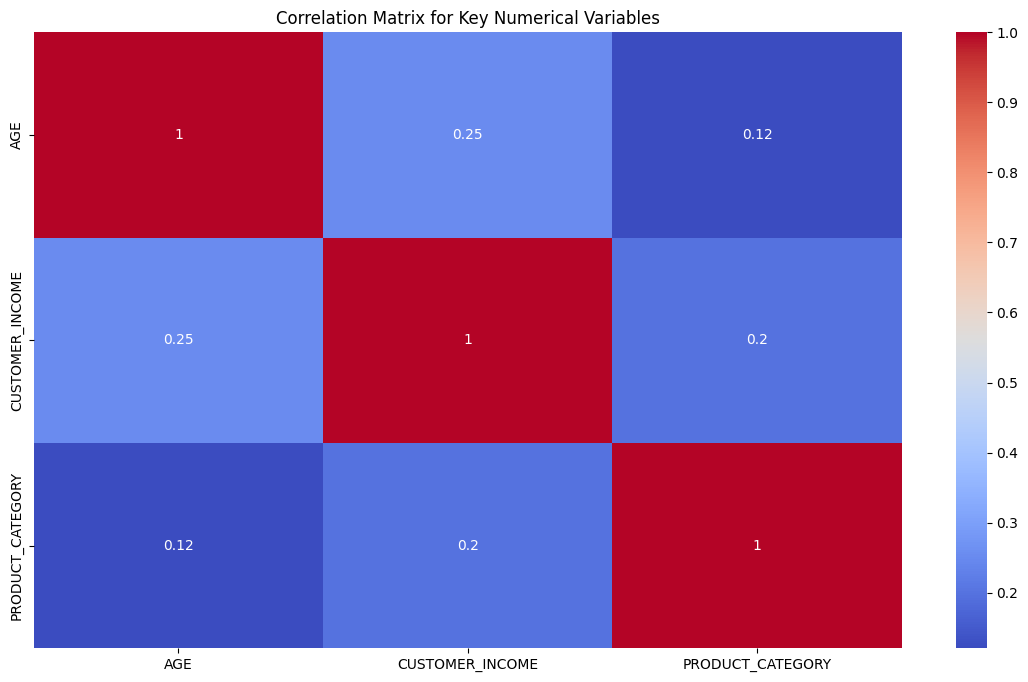

In [442]:
# Correlation heatmap for numerical variables
plt.figure(figsize=(14, 8))
sns.heatmap(merged_df[['AGE','CUSTOMER_INCOME','PRODUCT_CATEGORY']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Key Numerical Variables')
plt.show()

,LABOUR_CONTRACT_TYPE,NUMBER_OF_DEPENDANTS,INDUSTRY,JOB,CONTRACT_NO,EDUCATION,CUSTOMER_INCOME,CREDITIBILITY,ACCOMMODATION_TYPE,DATE_OF_BIRTH,...,HAS_INSURANCE,PRODUCT_CATEGORY,LOAN_TERM,MONTH_INTEREST,LOAN_PURPOSE,BUSINESS_LINE,LOAN_AMOUNT,DISBURSEMENT_YEAR,DISBURSEMENT_MONTH,AGE
0,4,0,18,6,569518,2,19092000.0,0,0,1969,...,1,1,24,2.600000,3,0,3.060000e+06,2023,9,55
1,4,0,2,6,569723,1,1936000.0,2,3,1964,...,0,0,24,1.700000,3,0,1.520000e+06,2023,9,60
2,2,1,18,0,569818,1,17533000.0,1,1,1990,...,1,2,24,2.000000,6,0,2.910000e+06,2023,9,34
3,2,0,18,1,569794,1,17018000.0,3,0,1991,...,0,1,24,1.700000,3,0,2.250000e+06,2023,9,33
4,4,2,18,9,810070,1,7025000.0,3,1,1991,...,0,1,12,2.000000,3,0,2.536650e+06,2023,9,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122929,1,0,18,4,630542,1,15413000.0,1,4,1990,...,1,1,24,2.900000,6,2,3.060000e+06,2023,12,34
122930,4,0,18,9,823387,3,18808000.0,1,3,1999,...,1,6,24,1.300000,3,0,1.360000e+06,2023,12,25
122931,4,3,18,6,630947,6,19262000.0,3,0,1976,...,1,2,36,1.700000,3,2,2.536650e+06,2023,12,48
122932,4,0,18,1,823371,1,17533000.0,3,4,1990,...,1,1,36,2.012365,6,0,3.060000e+06,2023,12,34


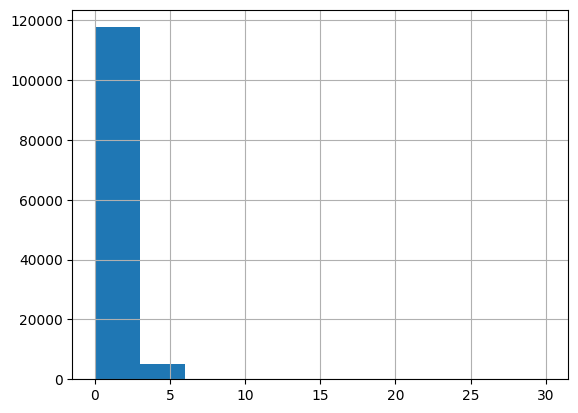

In [443]:
merged_2023['NUMBER_OF_DEPENDANTS'].hist()
merged_2023

In [444]:

colors = ['#FF0000', '#FF8700', '#FFD300', '#A1FF0A',
          '#0AFF99', '#0AEFFF', '#147DF5', '#BE0AFF']


def hist_plot(df, attr, colors, bin_size=1):
    min_value = df[attr].min()
    max_value = df[attr].max()
    bins = np.arange(min_value, max_value + bin_size * 2, bin_size)

    plt.figure(figsize=(22, 6))

    counts, bins, patches = plt.hist(df[attr], bins=bins, edgecolor='black')
    plt.xticks(bins, rotation=60)

    for count, patch in zip(counts, patches):
        plt.text(patch.get_x() + patch.get_width() / 2, count, int(count),
                 ha='center', va='bottom')

    for i, patch in enumerate(patches):
        patch.set_facecolor(colors[i % len(colors)])

    plt.xlabel(attr)
    plt.ylabel('Count')
    if hasattr(df, 'Name'):
        plt.title(f'Histogram Plot for {attr} of {df.Name}')
    else:
        plt.title(f'Histogram Plot for {attr}')


def hist_plot_1(df, attr, colors, bin_size=1):
    max_value = df[attr].max()
    # Tạo bins với khoảng cách 1 triệu
    bins = np.arange(0, max_value + bin_size, bin_size)

    plt.figure(figsize=(22, 6))
    counts, bins, patches = plt.hist(df[attr], bins=bins, edgecolor='black')

    labels = [f'{int(x)}M' for x in bins]
    plt.xticks(bins, labels, rotation=60)

    for count, patch in zip(counts, patches):
        plt.text(patch.get_x() + patch.get_width() / 2, count, int(count),
                 ha='center', va='bottom')

    for i, patch in enumerate(patches):
        patch.set_facecolor(colors[i % len(colors)])

    plt.xlabel(attr)
    plt.ylabel('Count')

    if hasattr(df, 'Name'):
        plt.title(f'Histogram Plot for {attr} of {df.Name}')
    else:
        plt.title(f'Histogram Plot for {attr}')

def pie_plot(df, attr, colors):
    counts = df[attr].value_counts()
    labels = counts.index.tolist()
    values = counts.values.tolist()

    colors = [colors[i % len(colors)] for i in range(len(labels))]

    plt.figure(figsize=(8, 8))
    wedges, texts = plt.pie(values, startangle=90, colors=colors, wedgeprops={
                            'edgecolor': 'black'}, labels=['']*len(values))

    legend_labels = [f'{label}: {value} ({percentage:.1f}%)' for label, value, percentage in zip(
        labels, values, [100 * v / sum(values) for v in values])]

    plt.legend(wedges, legend_labels, title=attr,
               loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    if hasattr(df, 'Name'):
        plt.title(f'Pie Chart for {attr} of {df.Name}')
    else:
        plt.title(f'Pie Chart for {attr}')


def pie_plot_1(df, attr, colors):
    counts = df[attr].value_counts()
    labels_tmp = counts.index.tolist()
    values_tmp = counts.values.tolist()
    # print(counts)

    labels = labels_tmp[:3]
    values = values_tmp[:3]
    labels.append('Greater than 2')
    values.append(sum(values_tmp[3:]))

    colors = [colors[i % len(colors)] for i in range(len(labels))]

    plt.figure(figsize=(8, 8))
    wedges, texts, autotexts = plt.pie(
        values, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})

    plt.legend(wedges, labels, title=attr, loc="center left",
               bbox_to_anchor=(1, 0, 0.5, 1))

    if hasattr(df, 'Name'):
        plt.title(f'Pie Chart for {attr} of {df.Name}')
    else:
        plt.title(f'Pie Chart for {attr}')

def box_plot(df, attr, colors):
    plt.figure(figsize=(22, 6))
    box = df.boxplot(column=attr, grid=False, vert=False, patch_artist=True, color=dict(boxes='blue', whiskers='black', medians='black', caps='black'))

    # Get the data for the specified attribute
    data = df[attr].dropna()  # Drop any NaN values

    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Define the outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    # Plot outliers with their values
    for outlier in outliers:
        plt.text(outlier, 1, f'{outlier}', ha='center', va='top', color='red', rotation=60)

    plt.xlabel(attr)
    if hasattr(df, 'Name') and df.Name:
        plt.title(f'Box Plot for {attr} of {df.Name}')
    else:
        plt.title(f'Box Plot for {attr}')

# def bar_plot(df, attr, colors):
#     counts = df[attr].value_counts()
#     labels = counts.index.tolist()
#     values = counts.values.tolist()

#     plt.figure(figsize=(22, 6))

#     bars = plt.bar(labels, values, edgecolor='black', color=[colors[i % len(colors)] for i in range(len(labels))])

#     plt.xticks(rotation=60)
#     plt.xlabel(attr)
#     plt.ylabel('Count')
#     if df.Name:
#         plt.title(f'Bar Plot for {attr} of {df.Name}')
#     else:
#         plt.title(f'Bar Plot for {attr}')

#     for bar, count in zip(bars, values):
#         plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(count),
#                  ha='center', va='bottom')

### MODEL 

C:\Users\PC\AppData\Local\Temp\ipykernel_29220\2907275780.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_data['CUSTOMER_INCOME'] = scaler.fit_transform(feature_data[['CUSTOMER_INCOME']])


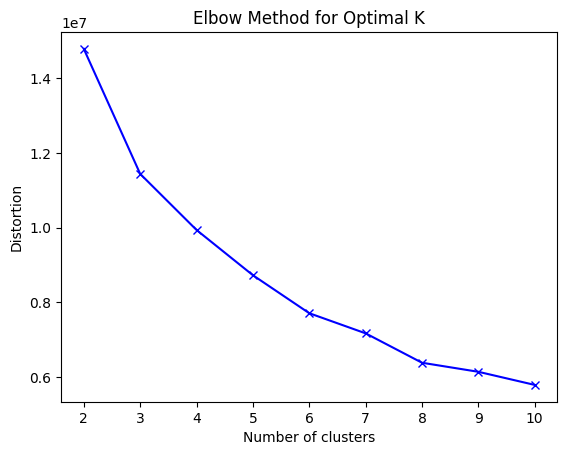

In [445]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

features = ['AGE', 'CUSTOMER_INCOME','JOB', 'MARITAL_STATUS', 'WORKING_IN_YEAR', 'EDUCATION', 'PRODUCT_CATEGORY']
feature_data = merged_df[features]


scaler = StandardScaler()
feature_data['CUSTOMER_INCOME'] = scaler.fit_transform(feature_data[['CUSTOMER_INCOME']])    
distortions = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(feature_data)
    distortions.append(kmeans.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal K')
plt.show()


In [446]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(feature_data)
feature_data['Cluster'] = clusters

C:\Users\PC\AppData\Local\Temp\ipykernel_29220\3261064053.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_data['Cluster'] = clusters


In [447]:
segment_analysis = feature_data.groupby('Cluster').mean()
print(segment_analysis)

               AGE  CUSTOMER_INCOME       JOB  MARITAL_STATUS  \
Cluster                                                         
0        26.736897        -0.368133  6.088751        0.868879   
1        35.830347         0.107777  5.647641        1.560962   
2        49.688997         0.321708  5.489807        1.906087   

         WORKING_IN_YEAR  EDUCATION  PRODUCT_CATEGORY  
Cluster                                                
0               2.639093   1.626863          1.677763  
1               5.049451   1.749723          2.342452  
2              10.743732   1.880875          2.555509  


C:\Users\PC\AppData\Local\Temp\ipykernel_29220\3167575486.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_data['PCA1'] = pca_result[:, 0]
C:\Users\PC\AppData\Local\Temp\ipykernel_29220\3167575486.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_data['PCA2'] = pca_result[:, 1]


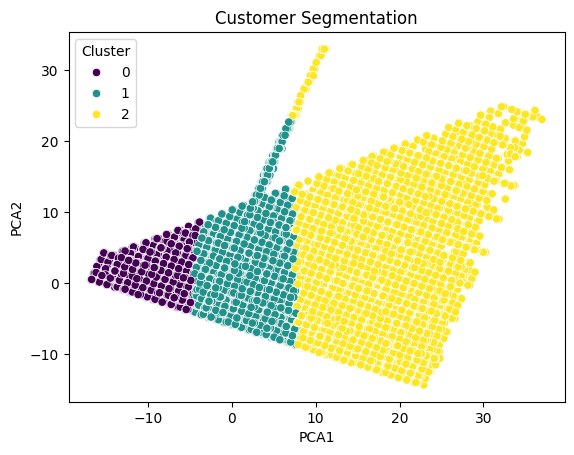

In [448]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca_result = pca.fit_transform(feature_data)
feature_data['PCA1'] = pca_result[:, 0]
feature_data['PCA2'] = pca_result[:, 1]

sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=feature_data, palette='viridis')
plt.title('Customer Segmentation')
plt.show()
